In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

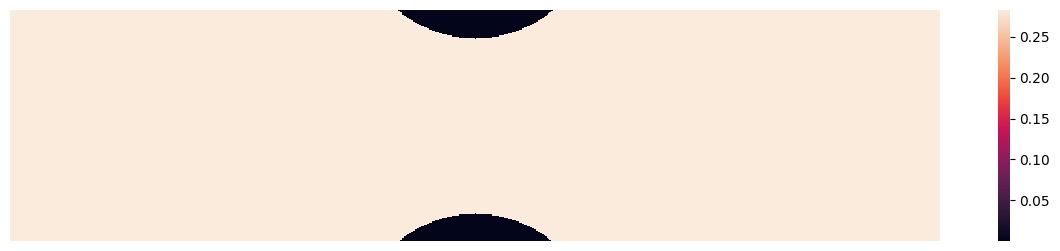

In [2]:
from constants import discretize_K, K1, K2, K3

plt.figure(figsize=(15,3))
ax = sns.heatmap(discretize_K(K1, 1000, 200).T)
ax.set_yticks([])
ax.set_xticks([])
plt.show()

In [3]:
# from st_nm import StationaryGrid
from boundary import get_boundary



In [5]:
n = 125
m = 31
t = 50

p_l, p_r = get_boundary(n, m, t)

In [6]:
from tqdm import tqdm

st_timed = []
for i in tqdm(range(t)):
    g = StationaryGrid(p_l[i], p_r[i], K1, n, m)
    g.iterate(criterion="div", max_div=1e-1)
    st_timed.append(g)


100%|██████████| 50/50 [02:56<00:00,  3.52s/it]


In [7]:
from matplotlib import animation

def create_gif(content_stream, filename, title, interval=200, skip=0):

    t = len(content_stream)
    no_frames = t // (skip + 1)
    times = np.linspace(0, 1, t)

    fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(15, 3), gridspec_kw=dict(width_ratios=[3, 1]))
    fig.tight_layout()

    im = axs[0].imshow(content_stream[0])
    cbar = axs[0].figure.colorbar(im, ax = axs[0])

    axs[0].set_title(title)
    axs[1].set_title("pressure on the borders")

    axs[0].set_yticks([])
    axs[0].set_xticks([])

    temperature_line, = axs[1].plot([], [], c="cornflowerblue")
    axs[1].plot(times, p_l[:, 0], "w", lw=0.3)

    def animate(i):
        im.set_data(content_stream[i * (skip + 1)])
        im.autoscale()

        temperature_line.set_data(times[:i * (skip + 1)], p_l[:i * (skip + 1), 0])

    ani = animation.FuncAnimation(
        fig, animate, no_frames, interval=interval, repeat=False)

    ani.save(f"{filename}.gif")



MovieWriter ffmpeg unavailable; using Pillow instead.


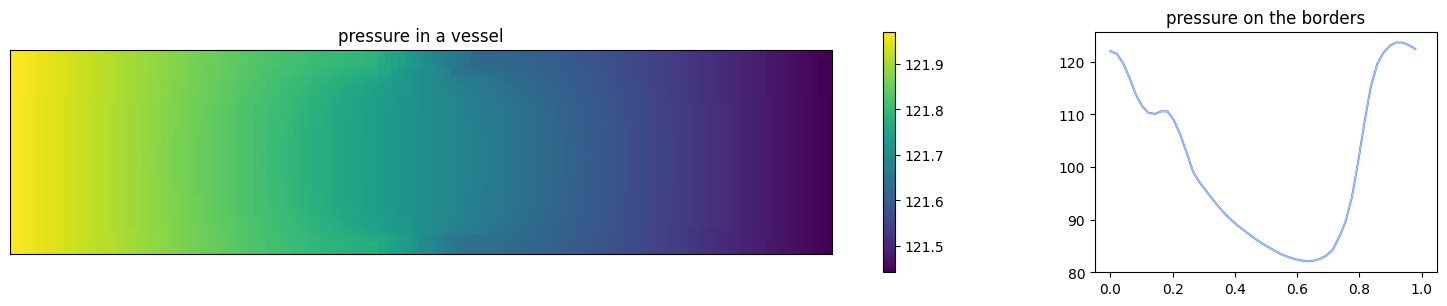

In [10]:
pressures = list(map(lambda grid: grid.p.T, st_timed))
create_gif(pressures, "stationary/K1pressure", "pressure in a vessel", skip=0)

In [12]:
import constants

def get_gradient(snapshot):
    gradient = np.zeros_like(snapshot)
    n, m = snapshot.shape

    for i in range(1, n-1):
        for j in range(1, m - 1):
            vx = (snapshot[i+1,j] - snapshot[i-1,j]) / (2/n)
            vz = (snapshot[i,j+1] - snapshot[i,j-1]) / (2/m)
            gradient[i, j] = np.sqrt(vz*vz + vx*vx)
    gradient[-1,:] = gradient[-2,:]
    gradient[:,-1] = gradient[:,-2]
    gradient[0,:] = gradient[1,:]
    gradient[:,0] = gradient[:,1]
    
    return gradient

def get_velocity(snapshot, K):
    velocity = get_gradient(snapshot) * K / constants.mu
    return velocity

gradients = []
velocities = []
for grid in tqdm(st_timed):
    gradients.append(get_gradient(grid.p).T)
    velocities.append(get_velocity(grid.p, grid.K).T)


100%|██████████| 50/50 [00:00<00:00, 160.95it/s]


MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.


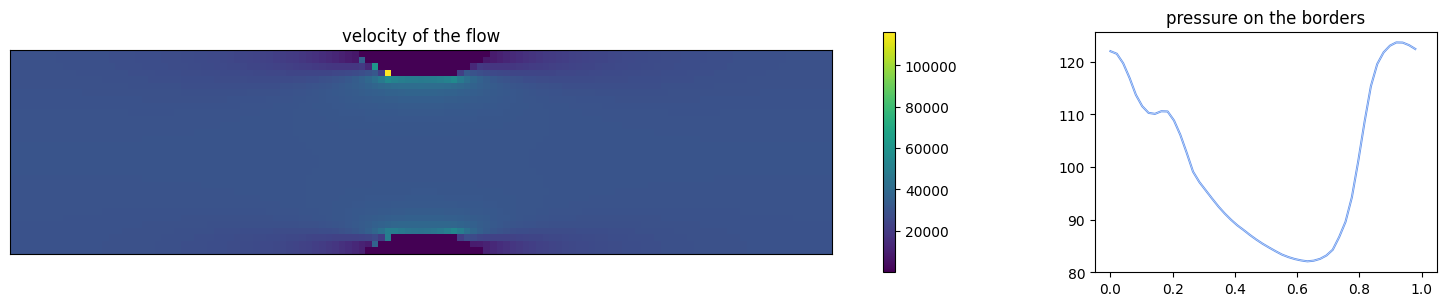

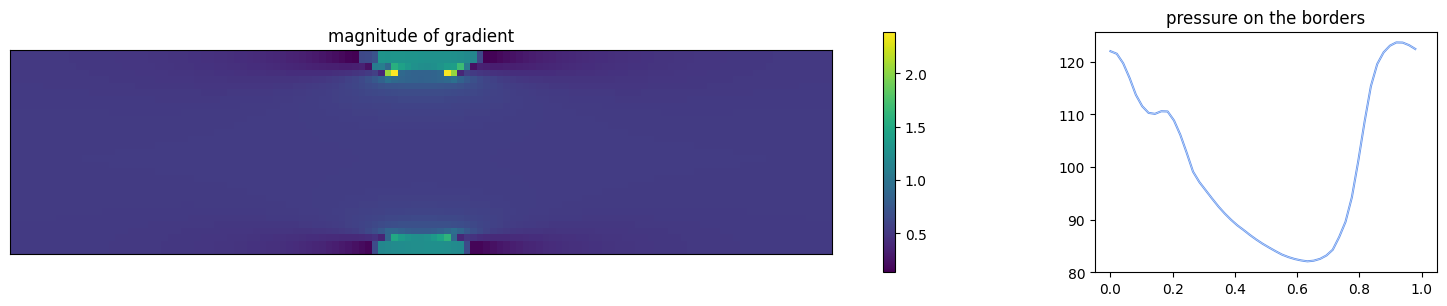

In [13]:
create_gif(velocities, "stationary/K1velocity", "velocity of the flow", skip=0)
create_gif(gradients, "stationary/K1gradients", "magnitude of gradient", skip=0)